In [12]:
import os
import pickle
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [14]:
# Step 1: Set up paths and check if the dataset was downloaded
dataset_path = "C:\\Users\\shant\\.cache\\kagglehub\\datasets\\mahdiislam\\pressure-sensor-heatmaprgb\\versions\\1\\"  # This is the directory where the dataset was downloaded

# Verify if the required files exist
X_path = os.path.join(dataset_path, "X_9_RGB.pickle")
y_path = os.path.join(dataset_path, "y_9_RGB.pickle")

if not os.path.exists(X_path) or not os.path.exists(y_path):
    raise FileNotFoundError(f"Missing dataset files! Ensure {X_path} and {y_path} exist.")


In [15]:
# Step 2: Load the data
with open(X_path, 'rb') as f:
    X_data = pickle.load(f)

with open(y_path, 'rb') as f:
    y_data = pickle.load(f)

print(f"X_data shape: {X_data.shape}")
print(f"y_data shape: {y_data.shape}")


X_data shape: (1801, 224, 224, 3)
y_data shape: (1801,)


In [16]:
# Step 3: Preprocess the Data (if needed)
# Example: Flatten the images if needed (e.g., if X_data is 3D, reshape to 2D for ML models)
X_data_flat = X_data.reshape(X_data.shape[0], -1)  # Flatten the images (assuming each image is 3D, e.g., (height, width, channels))


In [17]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data_flat, y_data, test_size=0.2, random_state=42)


In [18]:
# Step 5: Train a Random Forest Model (or any other model of your choice)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:
# Step 6: Make Predictions and Evaluate the Model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Model Accuracy: {accuracy * 100:.2f}%")


Random Forest Model Accuracy: 98.34%


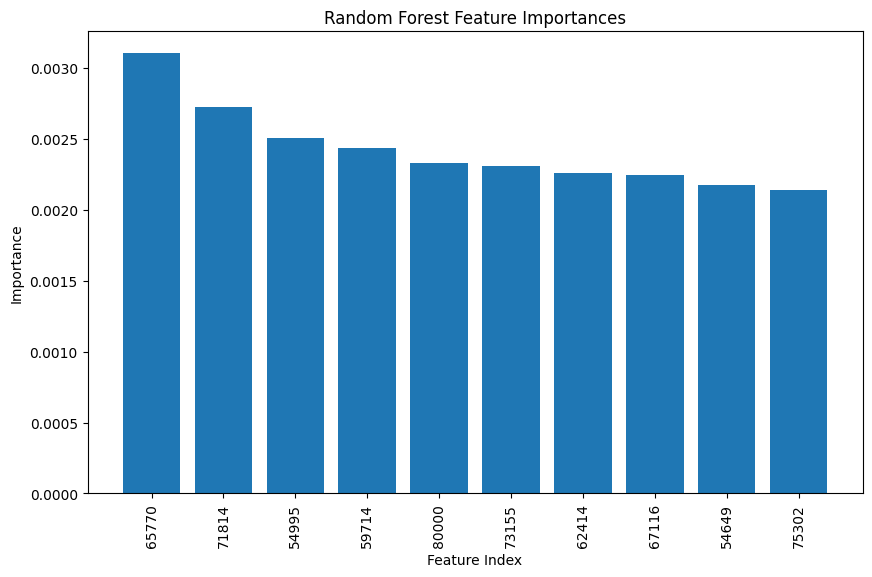

In [20]:
# Step 7: (Optional) Visualize the Feature Importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(10), importances[indices][:10], align="center")
plt.xticks(range(10), indices[:10], rotation=90)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


In [21]:
# Step 8: (Optional) Use the Model for Prediction on New Data
def predict_new_data(new_data):
    # Flatten the new data if necessary
    new_data_flat = new_data.reshape(1, -1)
    prediction = rf_model.predict(new_data_flat)
    return prediction

# Example usage for prediction (assuming you have a new input)
# new_input_image


In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Example input data shape, make sure to adjust this as per your actual data
X_train = np.random.rand(100, 128, 128, 3)  # Random example images, replace with your actual data
y_train = np.random.randint(0, 9, (100, 1))  # Random example labels, replace with your actual labels
y_train = tf.keras.utils.to_categorical(y_train, 9)  # One-hot encode labels

# Define the model (Example CNN)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(9, activation='softmax')  # Adjust output layers based on your classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Save the model after training
model.save('randomf_model.h5')  # Save the model to a file
print("Model saved successfully.")


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 383ms/step - accuracy: 0.1360 - loss: 23.3189
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 389ms/step - accuracy: 0.1178 - loss: 37.8417
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 367ms/step - accuracy: 0.1598 - loss: 16.9257
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 361ms/step - accuracy: 0.2736 - loss: 7.5632
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 361ms/step - accuracy: 0.3961 - loss: 2.8801


Model saved successfully.
